# Fall 2021 Data Science Intern Challenge 
## Question 1

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of \\$3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

### a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.
### TL;DR: AOV \\$3145.13 is calculated wrong. Correct value is \$357.92. Better way to evaluate this data is either to use median order value or remove the outliers.

There are many things could go wrong while analysing data. The analyst may forgot to take the division, subseted the wrong column, or used the wrong formula. Or perhaps even the data was too skewed to get a meaningful result.

First, let's make sure our calculation of average order value (AOV) is correct. AOV is the average amount of money spent on each order. To calculate AOV, we divide total revenue by the number of orders over a 30 day window.

In [1]:
# Setup our environment
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
shoe = pd.read_csv(r'../input/shopify-shoe-shop/shoe_shop.csv')

# Make the calculation
print("The actual value of AOV is", shoe["order_amount"].sum() / shoe["total_items"].sum())

The actual value of AOV is 357.92152221412965


Here it goes!🎉 The calculation is wrong, our actual AOV is around $357.92. Our sneakers are a little expensive, but that's about the price for sneakers!

Possibly, the given AOV $3145.13 is calculated by averaging the order amount of the 100 sneaker shops. So on average, our revenue is around \\$3145.13 per store. This could be an useful piece of information, but it is not how the AOV is calculated.

In [2]:
print("Given AOV is", shoe["order_amount"].mean())

Given AOV is 3145.128


Let's now take a look at how we could evaluate this data better.

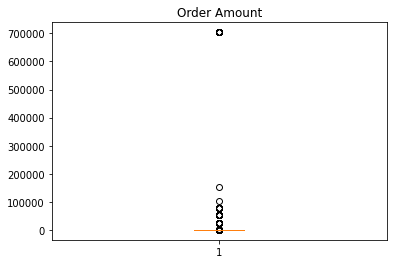

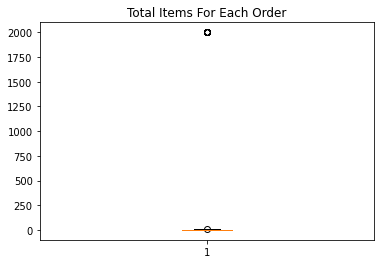

In [3]:
shoe["order_amount"].describe()
shoe["total_items"].describe()

plt.title("Order Amount")
plt.boxplot(shoe["order_amount"])
plt.show()
plt.title("Total Items For Each Order")
plt.boxplot(shoe["total_items"])
plt.show()

Both order amount and total items has a really large standard deviation. Indeed, the max of order amount is more than 200 times the 75% percentile! Similarly, if we take a look at total items, someone ordered more than 2000  sneakers where most people only ordered less than 3 pairs. The data completely threw our boxplot off because the data is really skewed to customers that ordered expensive items and customers that ordered many shoes!

Let's try to plot our data on log scale for a clearer visualization.

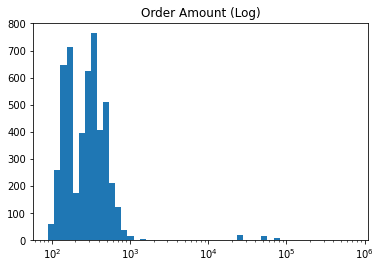

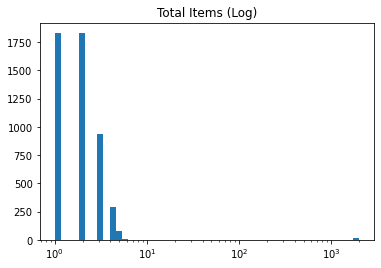

In [4]:
# A function to plot histograms on log scale
def plot_log_hist(x, bins):
    hist, bins = np.histogram(x, bins=bins)
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    plt.hist(x, bins=logbins)
    plt.xscale('log')
    plt.show()
 
plt.title("Order Amount (Log)")
plot_log_hist(shoe["order_amount"], 50)
plt.title("Total Items (Log)")
plot_log_hist(shoe["total_items"], 50)

Now it's much better! Let's take a count of the values to see what's up with the really large orders.

In [5]:
shoe['order_amount'].value_counts().sort_index(ascending = False).head(12)
shoe['total_items'].value_counts().sort_index(ascending = False)

2000      17
8          1
6          9
5         77
4        293
3        941
2       1832
1       1830
Name: total_items, dtype: int64

As we could see, we have a lot of orders of large amounts of sneakers. They are most likely factory customers that want to resell these sneakers later. We also have orders of really expensive shoes, those we won't need to worry about for our analysis because they are still relevant to AOV.

Let's quickly confirm our hypothesis.


In [6]:
shoe.sort_values(by='order_amount', ascending=False).head(21)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00


Indeed! We have the same customer ordering 2000 shoes from the same shoe store repeatedly. This is likely a someone that wants to resell these shoes later. This messes up our data. 

To minimize the influence of these outliers, we could either take the median order value instead of the average order value **or** remove/change the value of outliers. In this case, we should remove the outliers instead of taking the median because the outliers form relationship in data that the AOV doesn't actually measure.

Methods such as Z-score, windsorized estimators, robust statistics or bootstrapping are all useful for dealing with outliers. Here though, we'll just remove the outliers that lies outside of 1.5 times the interquatile range of our total_items ordered.


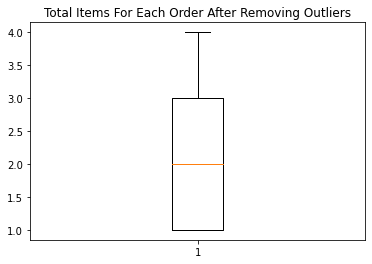

In [7]:
q1 = shoe["total_items"].quantile(q=0.25)
q2 = shoe["total_items"].quantile(q=0.5)
q3 = shoe["total_items"].quantile(q=0.75)
IQR = q3 - q1

shoe_cleaned = shoe[(shoe["total_items"] < (q2 + IQR * 1.5)) & (shoe["total_items"] > (q2 - IQR * 1.5))]

plt.title("Total Items For Each Order After Removing Outliers")
plt.boxplot(shoe_cleaned ["total_items"])
plt.show()

Here we go! Our boxplot is much better! We now have a dataframe that has fewer anamolies. Evaluating the data after removing anamolies is much more effective.

#### b) What metric would you report for this dataset? 

For this dataset, we only have information of orders of sneakers in 1 month. Hence, AOV is actually the most suited metric because we may able to compare the AOV for future months once we've collected more data.

Hence, the metric I chose is the modified AOV after removing outliers (or median order value of the original dataset).
#### c) What is its value?
The modified AOV after removing outliers is 372.71.

In [8]:
print("The modified AOV is", shoe_cleaned["order_amount"].sum() / shoe_cleaned["total_items"].sum())

The modified AOV is 372.7100853619981


## Question 2
For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

#### a) How many orders were shipped by Speedy Express in total?
#### Answer: 54



In [9]:
SELECT COUNT(*), Orders.ShipperID, Shippers.ShipperName
FROM Orders
INNER JOIN Shippers
    ON Orders.ShipperID = Shippers.ShipperID
GROUP BY Orders.ShipperID
ORDER BY Orders.ShipperID;

SyntaxError: invalid syntax (<ipython-input-9-73ed95af299e>, line 1)

#### b) What is the last name of the employee with the most orders?
#### Answer: Peacock


In [10]:
SELECT COUNT(*) AS TotalOrders, LastName
FROM Orders
INNER JOIN Employees
    ON Orders.EmployeeID = Employees.EmployeeID
GROUP BY Employees.EmployeeID
ORDER BY TotalOrders DESC
Limit 1;

SyntaxError: invalid syntax (<ipython-input-10-353e22e52cca>, line 1)

#### c) What product was ordered the most by customers in Germany?
#### Answer: Boston Crab Meat

In [11]:
SELECT p.ProductName, SUM(Quantity) AS TotalOrders 
FROM Orders AS o
INNER JOIN OrderDetails AS od 
    ON od.OrderID = o.OrderID
INNER JOIN Products AS p
    ON p.ProductID = od.ProductID
INNER JOIN Customers AS c
    ON c.CustomerID = o.CustomerID
WHERE Country = "Germany" 
GROUP BY od.ProductId
ORDER BY TotalOrders DESC
LIMIT 1;

SyntaxError: invalid syntax (<ipython-input-11-689b3cb455eb>, line 1)